In this notebook, I explore some of the competition's data. Let's get started!

In [2]:
import pandas as pd
from pathlib import Path
import missingno as msno
import pandas_profiling as pdp
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(font_scale=1.5)

In [9]:
INPUT_FOLDER = "data/"

In [38]:
train_path = Path(INPUT_FOLDER).joinpath('train.csv').absolute()
test_path = Path(INPUT_FOLDER).joinpath('test.csv').absolute()
merchants_path = Path(INPUT_FOLDER).joinpath('merchants.csv').absolute()
merged_train_path = Path(INPUT_FOLDER).joinpath('merged_train.csv').absolute()
historical_transactions_path = Path(INPUT_FOLDER).joinpath('historical_transactions.csv').absolute()
to_drop_cols = ["first_active_month", "card_id", "authorized_flag", "category_1_transactions",
                "category_3", "merchant_id", "purchase_date", "category_1_merchants",
                "most_recent_sales_range", "most_recent_purchases_range", "category_4"]

In [39]:
historical_transactions_df = pd.read_csv(historical_transactions_path)

In [12]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
# TODO: It seems that the merge process didn't happen as expected. Investigate...
merged_train_df = pd.read_csv(merged_train_path).drop(to_drop_cols, axis=1)
merchants_df = pd.read_csv(merchants_path)
historical_transactions_df = pd.read_csv(historical_transactions_path)

In [13]:
train_df.shape

(201917, 6)

In [14]:
test_df.shape

(123623, 5)

In [15]:
merged_train_df.shape

(18700121, 40)

In [40]:
historical_transactions_df.shape

(29112361, 14)

In [16]:
train_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

In [17]:
test_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3'], dtype='object')

In [36]:
merchants_df.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [18]:
merged_train_df.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'authorized_flag', 'city_id_transactions',
       'category_1_transactions', 'installments', 'category_3',
       'merchant_category_id_transactions', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2_transactions',
       'state_id_transactions', 'subsector_id_transactions',
       'merchant_group_id', 'merchant_category_id_merchants',
       'subsector_id_merchants', 'numerical_1', 'numerical_2',
       'category_1_merchants', 'most_recent_sales_range',
       'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_lag12', 'category_4', 'city_id_merchants',
       'state_id_merchants', 'category_2_merchants'],
      dtype='object')

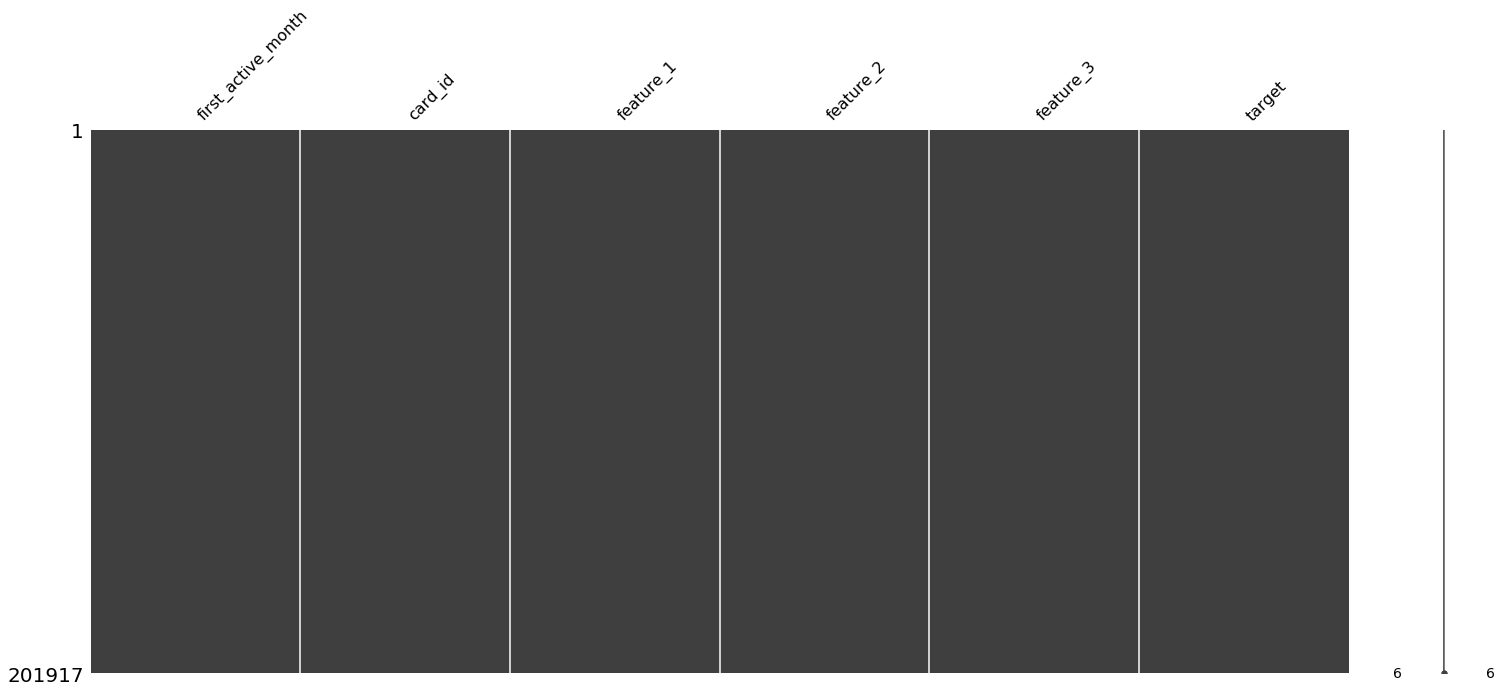

In [11]:
msno.matrix(train_df)

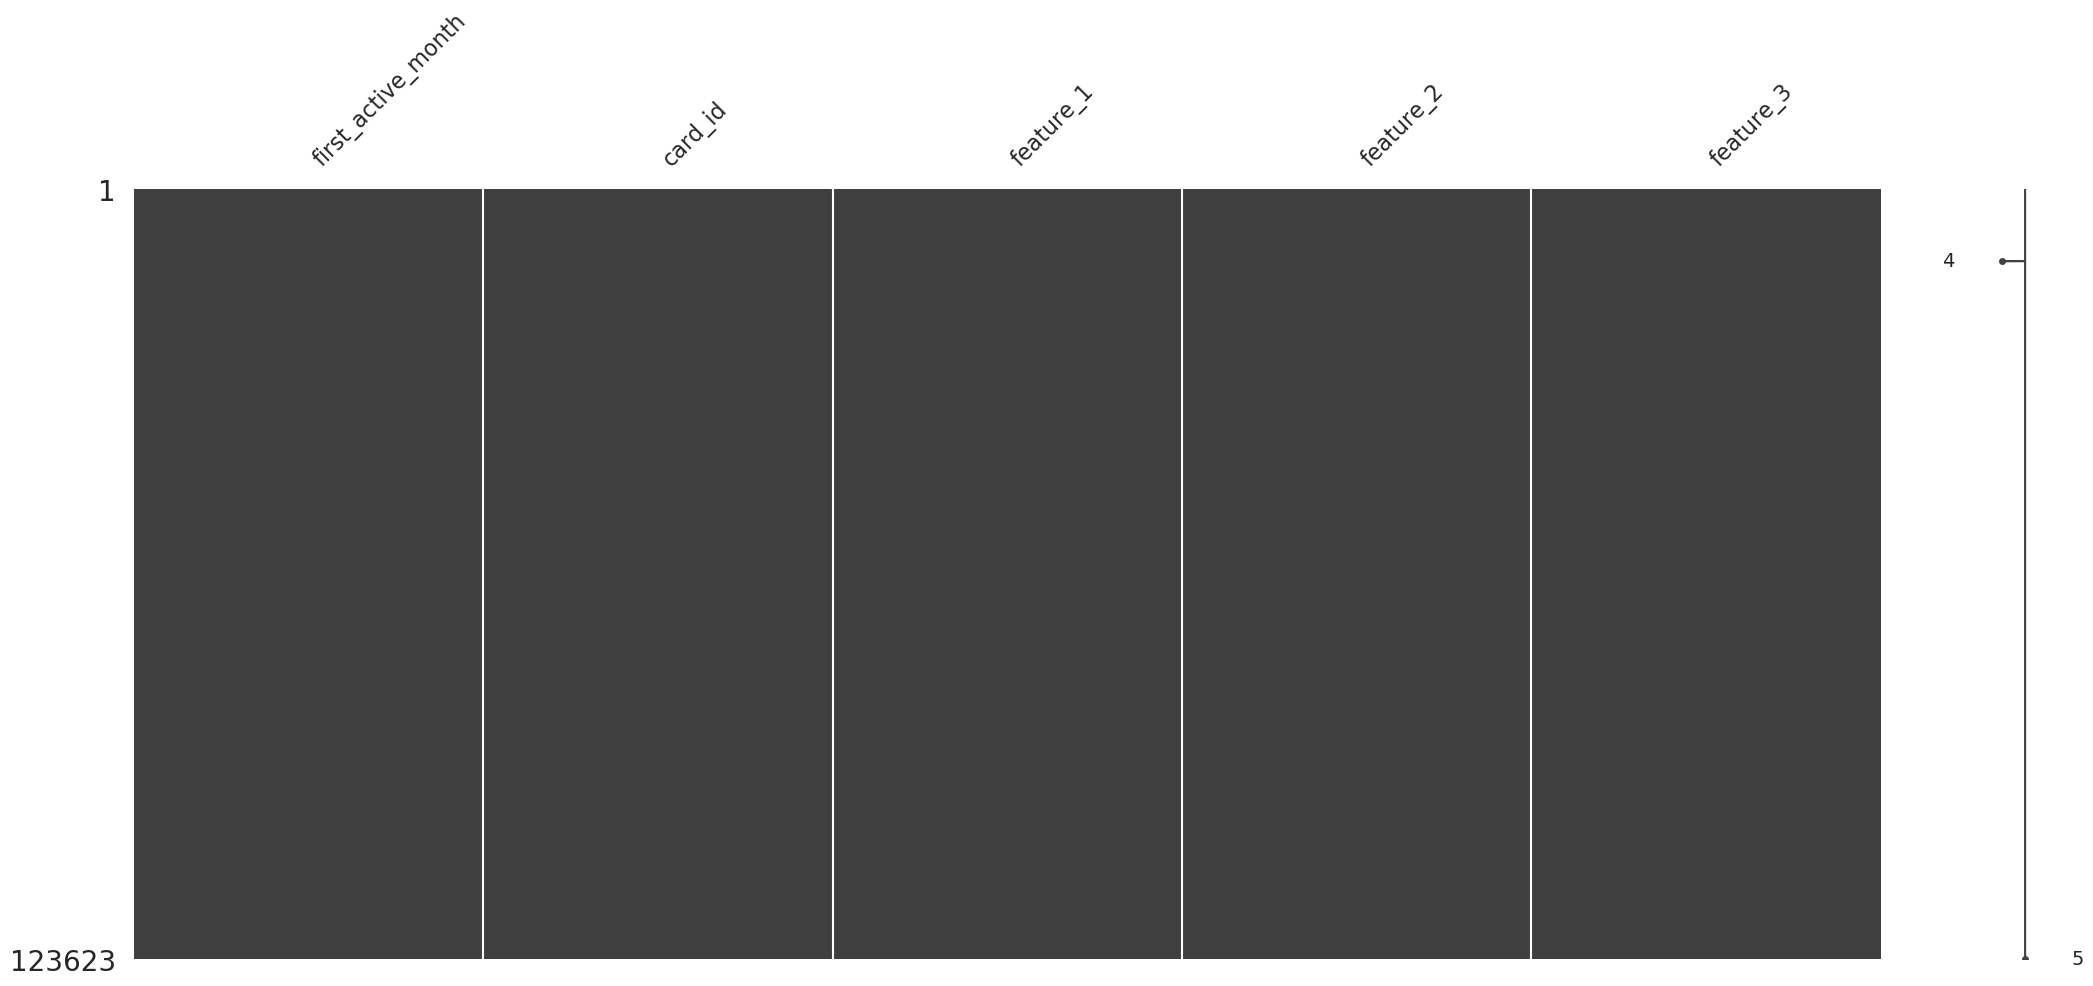

In [79]:
msno.matrix(test_df)

=> No missing data for either training nor test, which is a good thing!

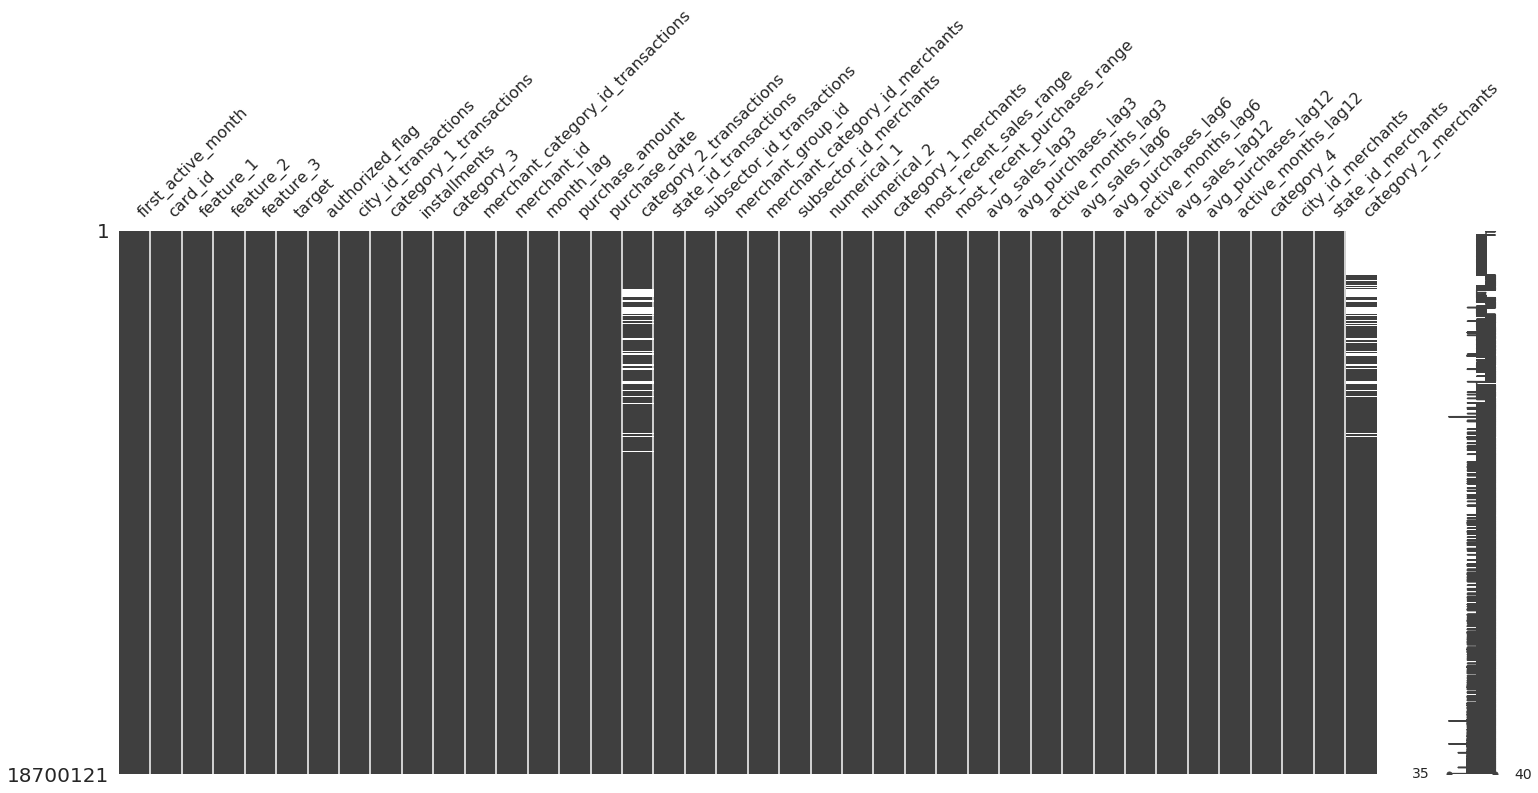

In [19]:
msno.matrix(merged_train_df)

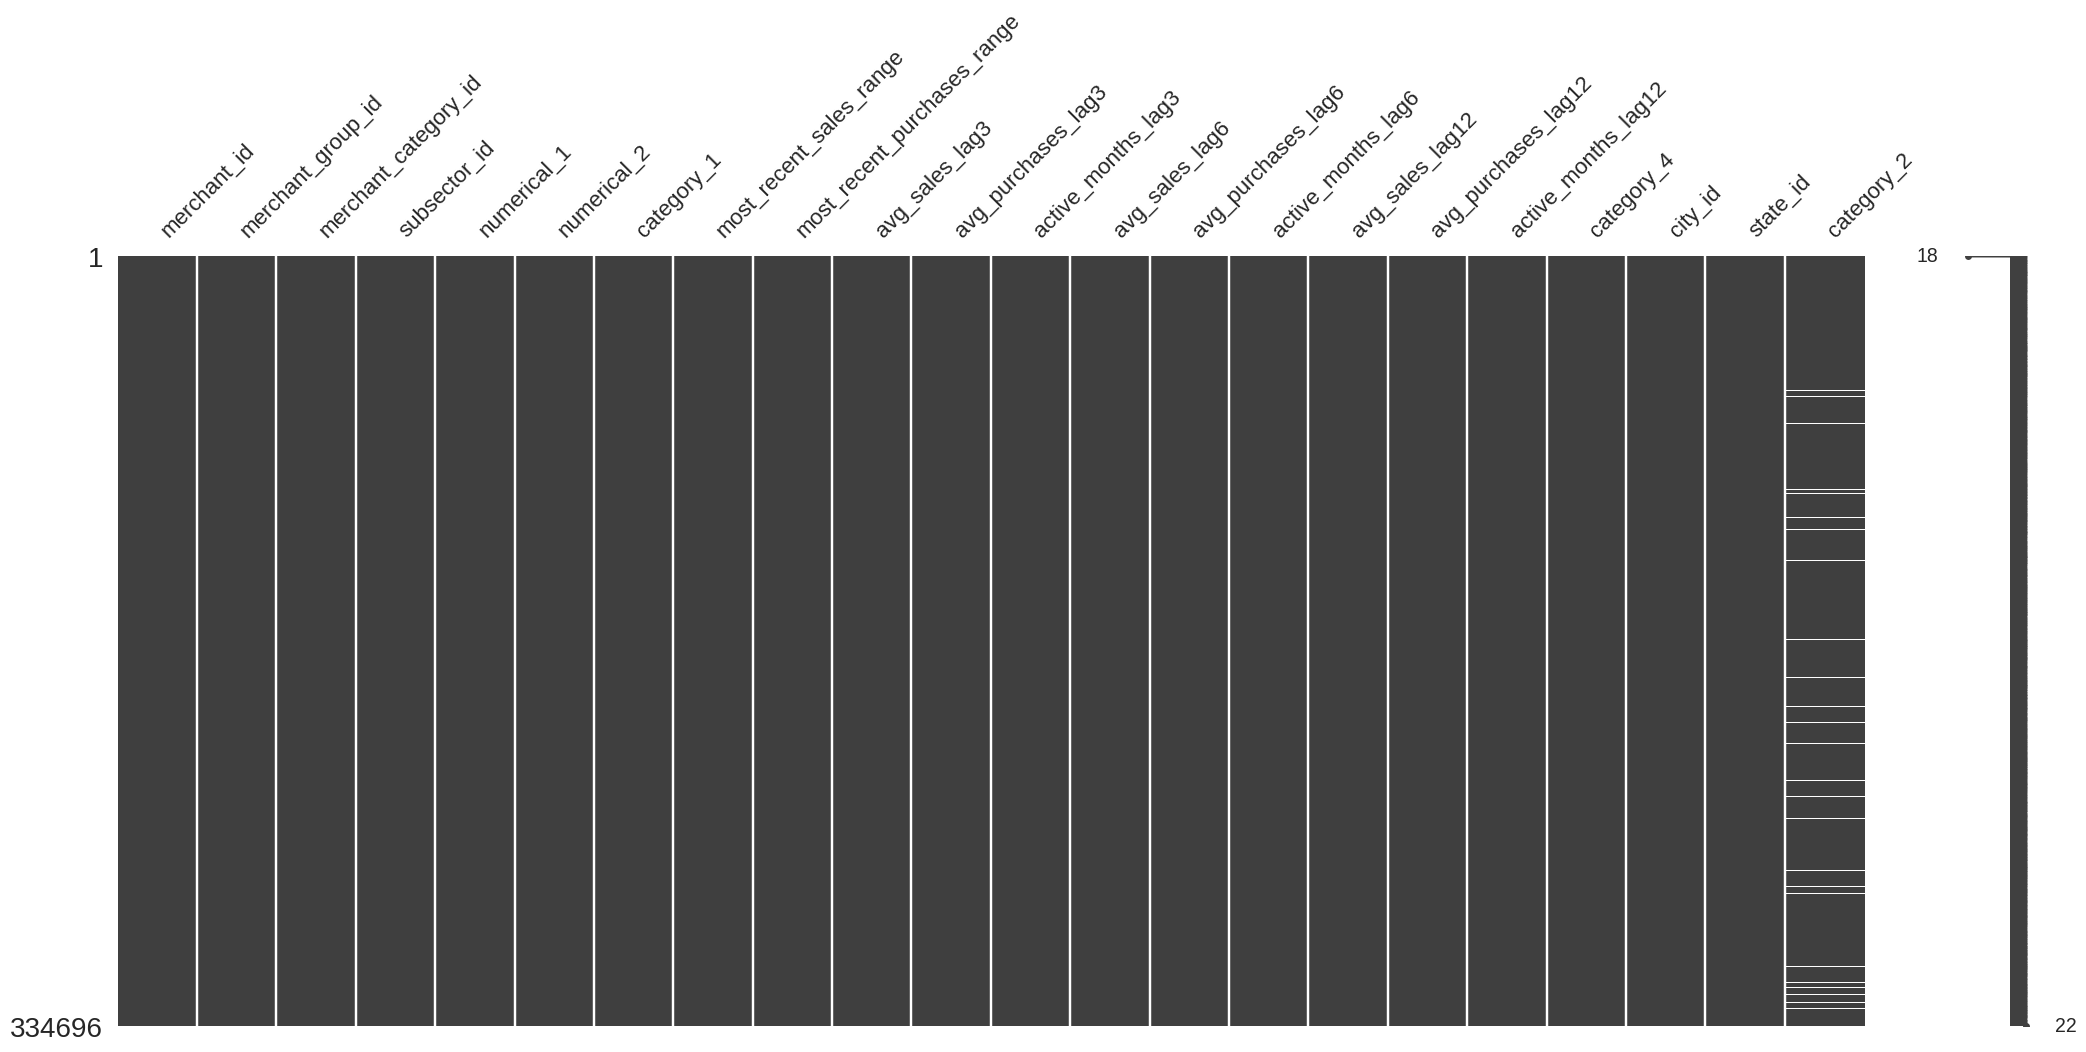

In [37]:
msno.matrix(merchants_df)

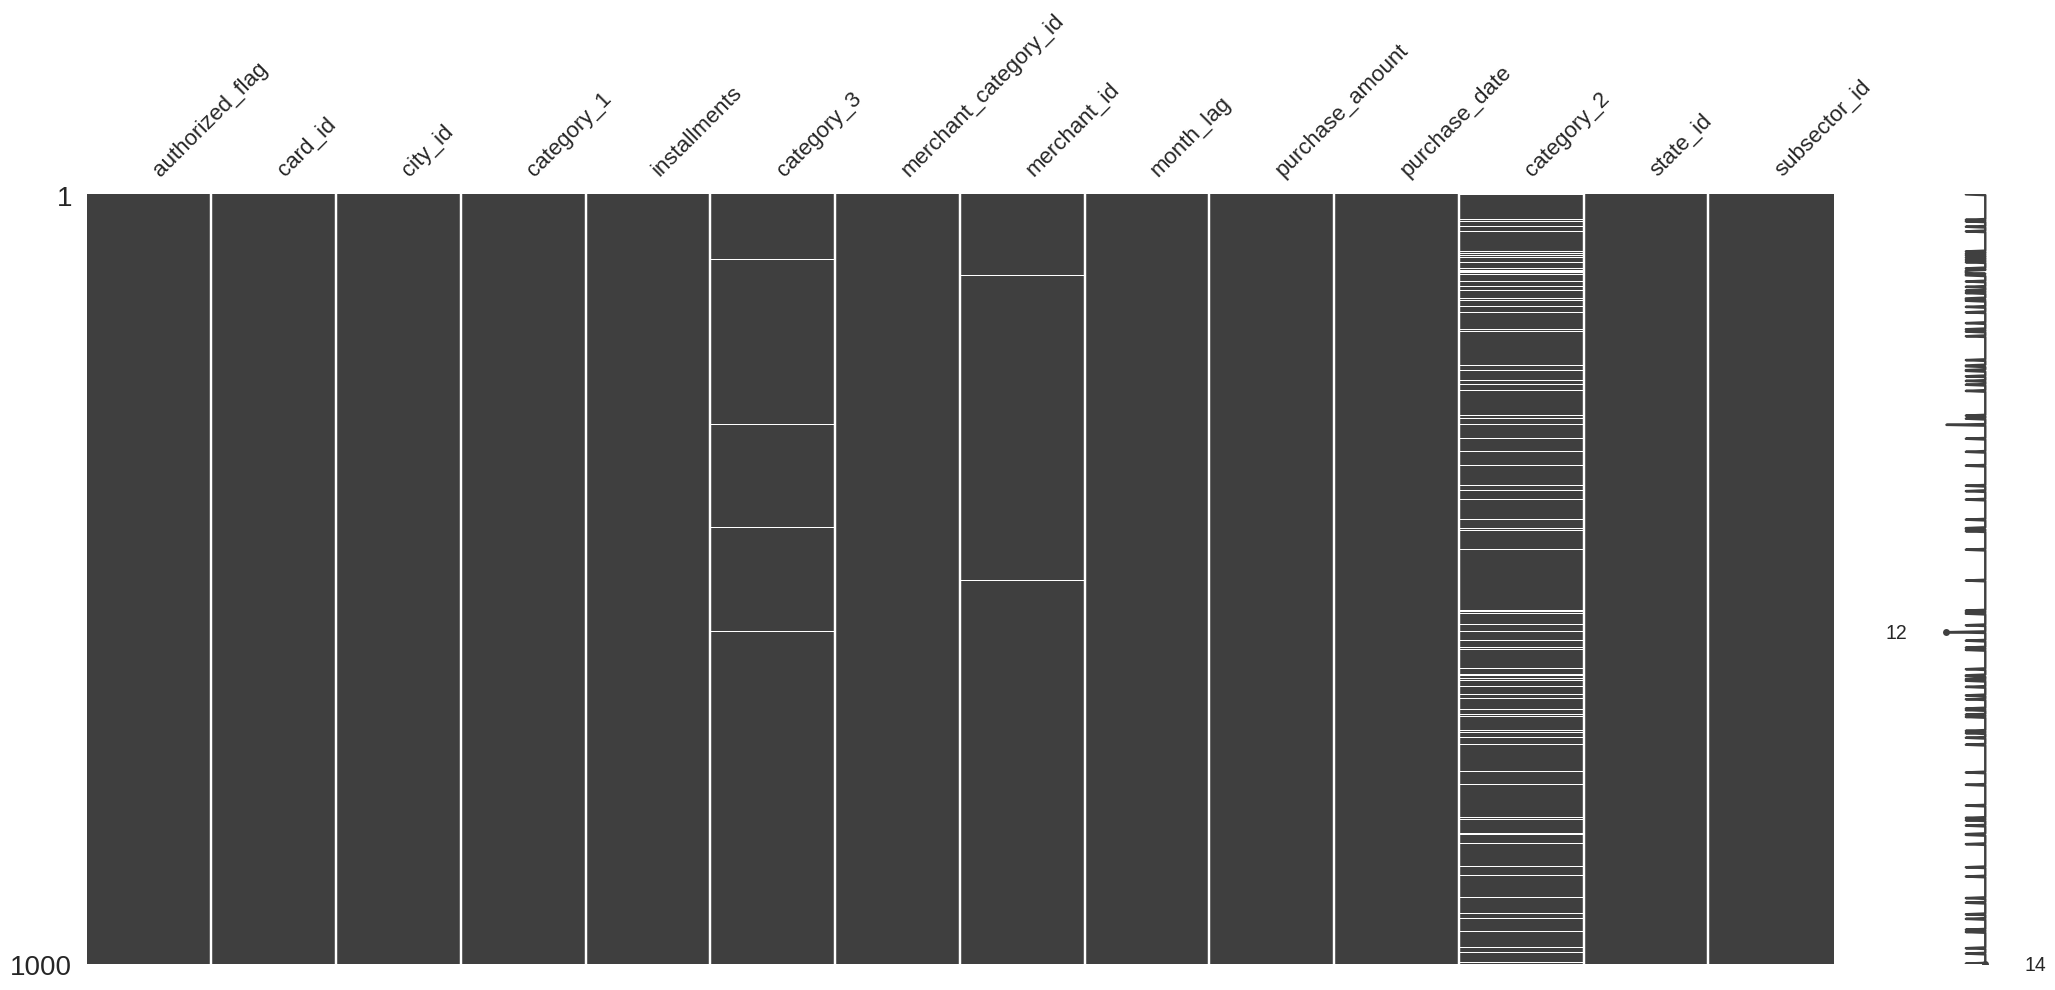

In [42]:
msno.matrix(historical_transactions_df.sample(1000))

In [21]:
train_profile_report = pdp.ProfileReport(train_df)
test_profile_report = pdp.ProfileReport(test_df)
# merged_train_profile_report = pdp.ProfileReport(merged_train_df)

In [81]:
train_profile_report.to_file('train_profile_report.html')
test_profile_report.to_file('test_profile_report.html')

In [28]:
merged_train_df.isna().sum()

feature_1                                  0
feature_2                                  0
feature_3                                  0
target                                     0
city_id_transactions                       0
installments                               0
merchant_category_id_transactions          0
month_lag                                  0
purchase_amount                            0
category_2_transactions              1684479
state_id_transactions                      0
subsector_id_transactions                  0
merchant_group_id                          0
merchant_category_id_merchants             0
subsector_id_merchants                     0
numerical_1                                0
numerical_2                                0
avg_sales_lag3                          5638
avg_purchases_lag3                         0
active_months_lag3                         0
avg_sales_lag6                          5638
avg_purchases_lag6                         0
active_mon

# Card_id exploration

In [22]:
train_df['card_id'].nunique()

201917

In [23]:
len(train_df['card_id'])

201917

=> Appears to be an ID and not useful to predict. Unless some values are common with the test?

In [85]:
set(test_df.card_id.unique()) & set(train_df.card_id.unique())

set()

Feature 1 and feature 2 are categorical features with 5 and 3 distinct values. 
Feature 3 is a boolean one

# First active month

In [27]:
train_df['first_active_month'].nunique()

75

In [28]:
len(train_df['first_active_month'])

201917

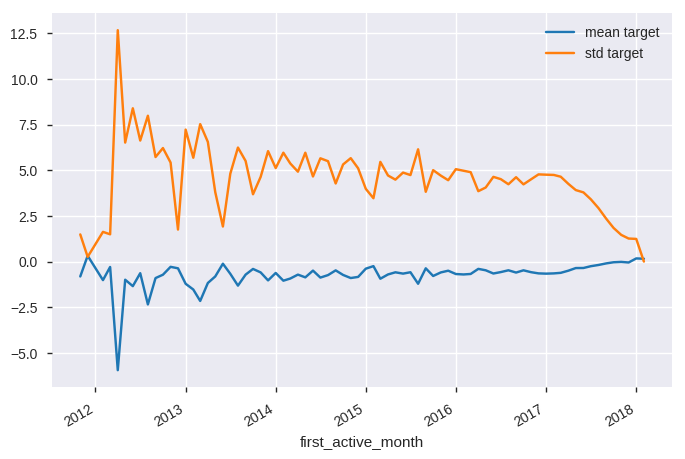

In [40]:
(train_df.assign(first_active_month=lambda df: pd.to_datetime(df["first_active_month"]))
         .groupby('first_active_month').target
         .agg(['mean', lambda g: np.where(len(g) > 1, g.std(), 0)])
         .rename(columns={"mean": "mean target", "<lambda>": "std target"})
         .plot())

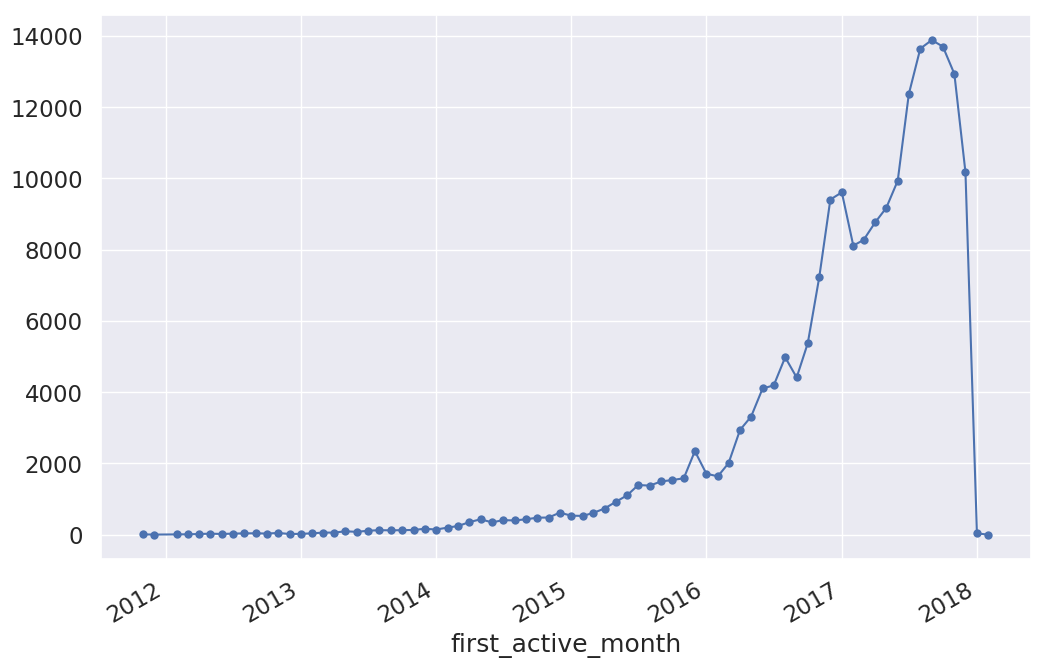

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

(train_df.assign(first_active_month=lambda df: pd.to_datetime(df["first_active_month"]))
         .groupby('first_active_month')
         .target
         .count()
         .plot(style='o-', ax=ax))

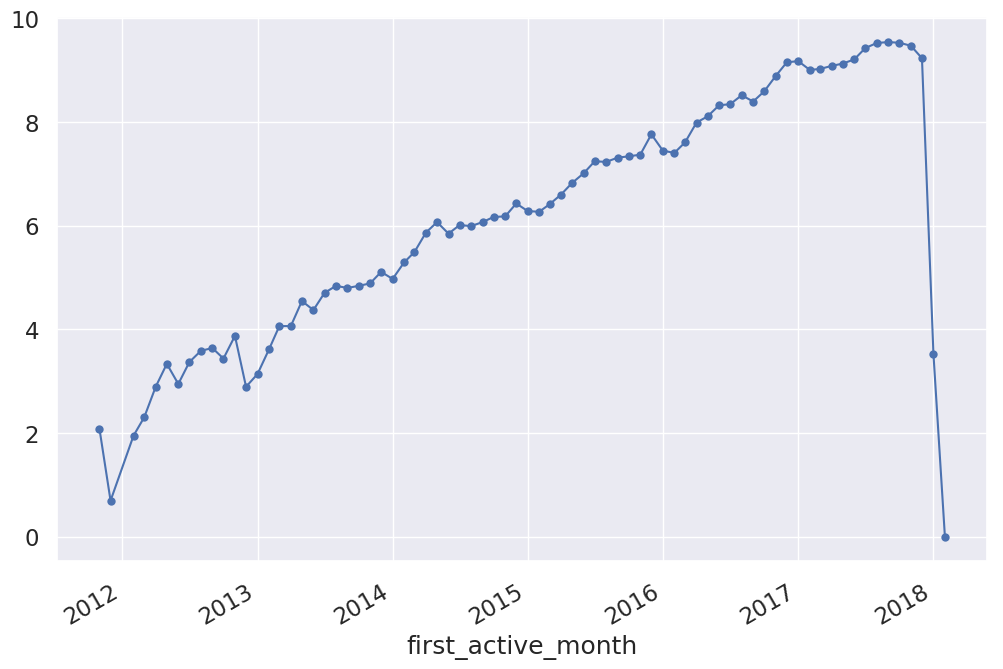

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

(train_df.assign(first_active_month=lambda df: pd.to_datetime(df["first_active_month"]))
         .groupby('first_active_month')
         .target
         .agg(lambda g: np.log(g.count()))
         .plot(style='o-', ax=ax))

In [73]:
# TODO: Make this importable
# Finish this
# from elo_merchant_category_recommendation.benchmark import linear_benchmark